In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeRegressor
#from sklearn import tree
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import cross_val_score
#from sklearn.preprocessing import LabelEncoder
#from sklearn.tree import plot_tree
#from sklearn.metrics import mean_squared_error
#from sklearn.inspection import PartialDependenceDisplay
#from sklearn.inspection import partial_dependence
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import plot_tree
#from sklearn.metrics import mean_tweedie_deviance
#from sklearn.ensemble import GradientBoostingRegressor


ImportError: cannot import name 'mean_poisson_deviance' from 'sklearn.metrics._regression' (/Users/cr24/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py)

In [ ]:
#Import data
data = pd.read_csv('/Users/cr24/Desktop/Data Science Assignment/Assignment.csv')

# transform the column names to lowercase
data.columns = data.columns.str.lower()
data = data.rename(columns= {'duree': 'expo','nbrtotan': 'freq','nbrtotc': 'nclaims'})
data = data.drop(['lnexpo','codposs','chargtot','sexp','split'],axis=1)


In [ ]:
data.head(100)

,ageph,expo,nclaims,freq,agecar,fuelc,usec,fleetc,sportc,coverp,powerc
0,64,1.000000,0,0.000000,2-5,Petrol,Private,No,No,MTPL+,66-110
1,28,0.046575,1,21.470588,6-10,Petrol,Private,No,No,MTPL,66-110
2,58,0.402740,0,0.000000,>10,Petrol,Private,No,No,MTPL,<66
3,37,0.169863,0,0.000000,2-5,Petrol,Professional,No,No,MTPL+++,66-110
4,29,1.000000,0,0.000000,6-10,Petrol,Private,No,No,MTPL+,<66
...,...,...,...,...,...,...,...,...,...,...,...
95,49,1.000000,0,0.000000,6-10,Petrol,Private,No,No,MTPL+,<66
96,28,1.000000,0,0.000000,2-5,Petrol,Private,Yes,No,MTPL+++,66-110
97,29,1.000000,0,0.000000,6-10,Petrol,Private,No,No,MTPL,66-110
98,31,0.301370,2,6.636364,>10,Petrol,Private,No,No,MTPL,66-110


In [ ]:
#Import data
data = pd.read_csv('/Users/cr24/Desktop/Data Science Assignment/Assignment.csv')

# transform the column names to lowercase
data.columns = data.columns.str.lower()
data = data.rename(columns= {'duree': 'expo','nbrtotan': 'freq','nbrtotc': 'nclaims'})
data = data.drop(['lnexpo','codposs','chargtot','sexp','split'],axis=1)


In [ ]:
# Features
columns_all = ['expo','ageph','agecar', 'fuelc', 'usec', 'fleetc', 'sportc', 'coverp', 'powerc']
x = data[columns_all]

# Frequency
y = np.array(data['freq'])  


In [ ]:
# List of categorical variables
categorical_variables = ['agecar', 'fuelc', 'usec', 'fleetc', 'sportc', 'coverp', 'powerc']

# Encoding categorical variables one by one
label_encoders = {}
for var in categorical_variables:
    label_encoders[var] = LabelEncoder()
    x[var] = label_encoders[var].fit_transform(x[var])

In [ ]:
# Assuming x and y are defined previously as the feature and target variables
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
expo_train = X_train['expo']
X_train = X_train.drop('expo',axis=1)
expo_test  = X_test['expo']
X_test = X_test.drop('expo',axis=1)


In [ ]:
expo_train.reset_index(drop=True,inplace=True)
expo_test.reset_index(drop=True,inplace=True)

In [ ]:
X_train

,ageph,agecar,fuelc,usec,fleetc,sportc,coverp,powerc
138702,61,1,1,0,0,0,1,0
93691,65,3,1,0,0,0,0,1
56814,46,1,1,0,0,0,0,1
70506,45,1,1,0,0,0,0,1
131017,64,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
119879,50,1,0,0,0,0,0,1
103694,58,1,1,0,0,0,0,1
131932,60,2,0,0,0,0,0,1
146867,57,2,1,0,0,0,0,1


In [ ]:
tree_freq = DecisionTreeRegressor(criterion='poisson',max_depth=2)

In [ ]:
tree_freq.fit(X_train,y_train,sample_weight=expo_train)

DecisionTreeRegressor(criterion='poisson', max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[0] <= 31.5\npoisson = 0.31\nsamples = 130925\nvalue = 0.139'),
 Text(0.25, 0.5, 'x[0] <= 26.5\npoisson = 0.395\nsamples = 22255\nvalue = 0.208'),
 Text(0.125, 0.16666666666666666, 'poisson = 0.434\nsamples = 9031\nvalue = 0.245'),
 Text(0.375, 0.16666666666666666, 'poisson = 0.366\nsamples = 13224\nvalue = 0.183'),
 Text(0.75, 0.5, 'x[0] <= 57.5\npoisson = 0.289\nsamples = 108670\nvalue = 0.126'),
 Text(0.625, 0.16666666666666666, 'poisson = 0.307\nsamples = 74982\nvalue = 0.138'),
 Text(0.875, 0.16666666666666666, 'poisson = 0.247\nsamples = 33688\nvalue = 0.099')]

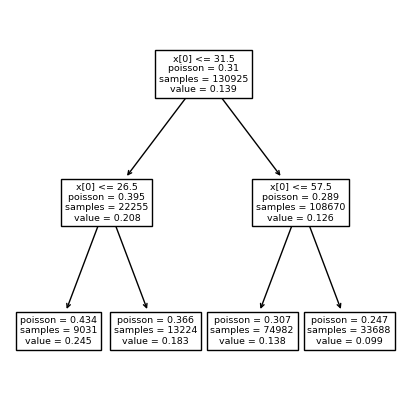

In [ ]:
# plot the tree structure
plt.figure(figsize=(5, 5), dpi=100)
plot_tree(tree_freq)

In [ ]:
# Training Error
y_pred = tree_freq.predict(X_train)
print('training error:',mean_tweedie_deviance(y_train, y_pred, power=1))

# Test Error
y_pred = tree_freq.predict(X_test)
print('test error:',mean_tweedie_deviance(y_test, y_pred, power=1))


training error: 0.7720962829901354
test error: 0.7787218595285138


In [ ]:
# define a parameter grid as a dict
param_grid = {
'n_estimators' : [10,20,50,100],
'max_features' : ['sqrt', 'log2'],
'max_depth' : [3, 5, 8],
'ccp_alpha' : [0,0.2,0.4,0.6]
}
# initialize the model and CV
rf_freq = RandomForestRegressor(criterion='poisson',max_depth=10, random_state=0,bootstrap=True)
rf_freq_cv = GridSearchCV(rf_freq, param_grid, cv=5, scoring='neg_mean_poisson_deviance')
# fit the CV
rf_freq_cv.fit(X_train, y=y_train, sample_weight=expo_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='poisson', max_depth=10,
                                             random_state=0),
             param_grid={'ccp_alpha': [0, 0.2, 0.4, 0.6],
                         'max_depth': [3, 5, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='neg_mean_poisson_deviance')

In [ ]:
# collect results
results_cv = rf_freq_cv.cv_results_
# store in a dataframe
results_pd = pd.DataFrame.from_dict(
    {'depth':results_cv['param_max_depth'].data,
     'estimators':results_cv['param_n_estimators'].data,
     'features' : results_cv['param_max_features'].data,
     'rank':results_cv['rank_test_score']}).sort_values('rank')

# show the top results
results_pd.iloc[0:6]

,depth,estimators,features,rank
23,8,100,log2,1
22,8,50,log2,2
20,8,10,log2,3
21,8,20,log2,4
19,8,100,sqrt,5
18,8,50,sqrt,6


In [ ]:
rf_optim_freq = RandomForestRegressor(criterion='poisson',max_depth=8,n_estimators=100,max_features='log2', random_state=0,bootstrap=True)
rf_optim_freq.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=8, max_features='log2',
                      random_state=0)

In [ ]:
# Training Error
y_pred = rf_optim_freq.predict(X_train)
print('training error:',mean_tweedie_deviance(y_train, y_pred, power=1))

# Test Error
y_pred = rf_optim_freq.predict(X_test)
print('test error:',mean_tweedie_deviance(y_test, y_pred, power=1))



training error: 0.7429790161016036
test error: 0.7758964446594587


NameError: name 'mean_tweedie_deviance' is not defined

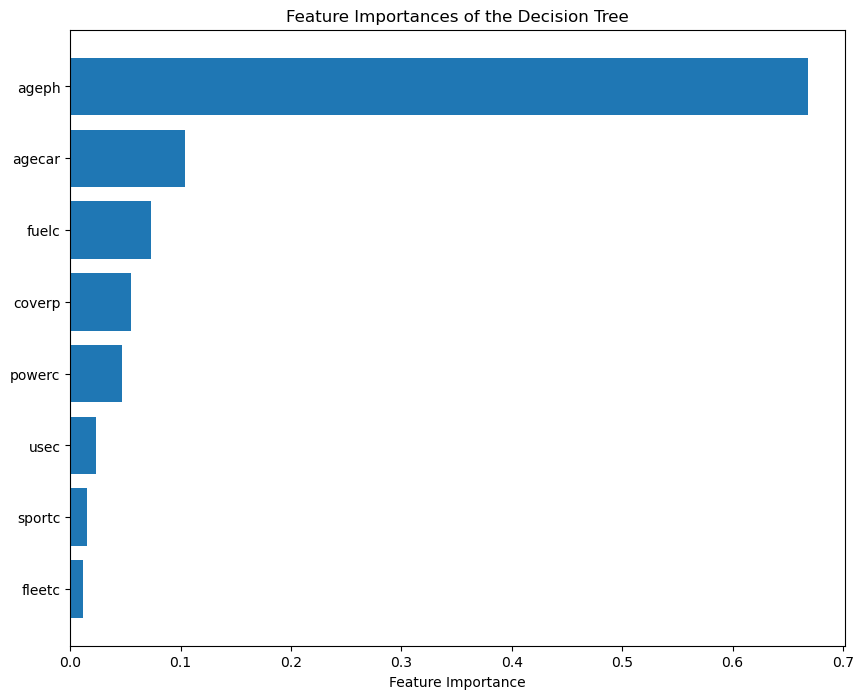

In [ ]:
feature_importances = pd.Series(rf_optim_freq.feature_importances_, index=X_train.columns)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_importances.index, sorted_feature_importances.values)
plt.xlabel('Feature Importance')
plt.title('Feature Importances of the Decision Tree')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

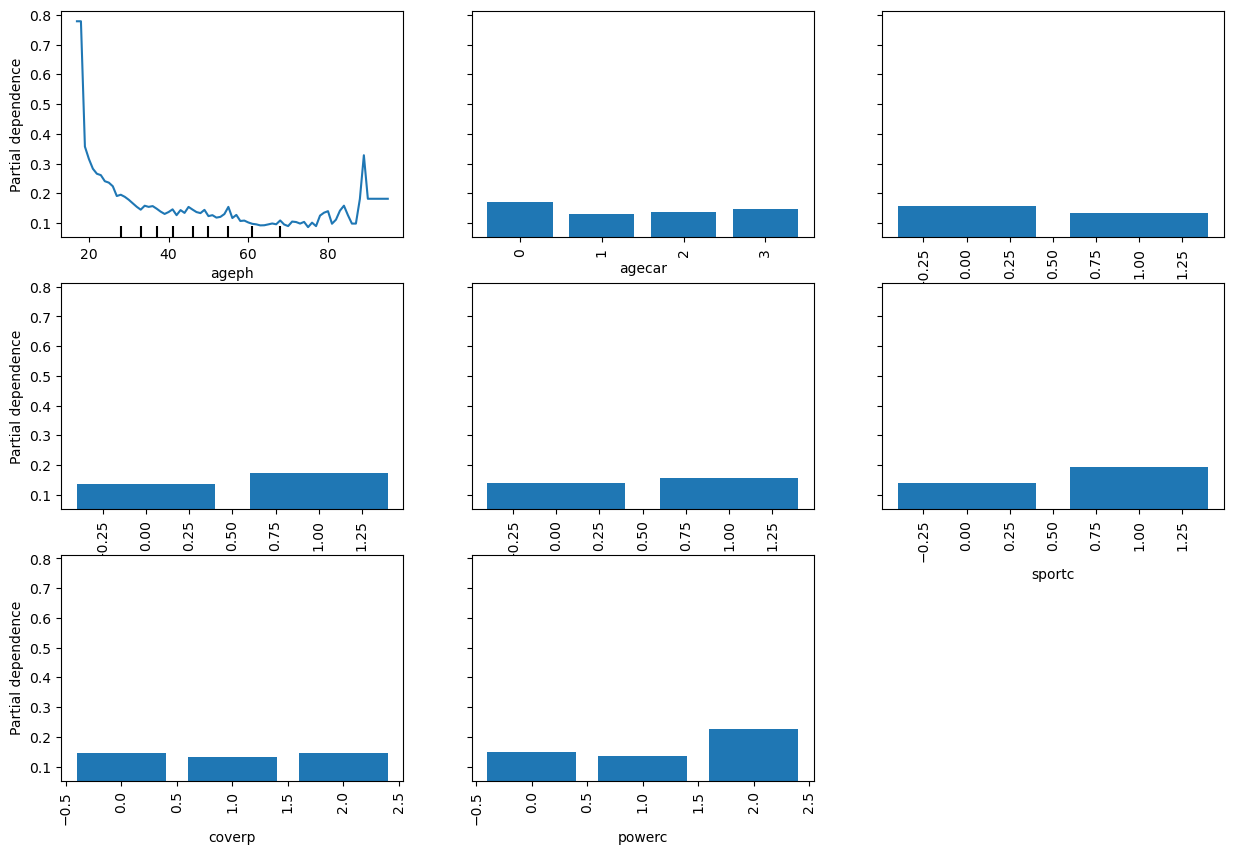

In [ ]:
# create pdps for a couple of features
fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(tree_freq, X_train, features = X_train.columns, categorical_features=categorical_variables, kind='average', ax=ax);

In [ ]:

ice = partial_dependence(tree_freq,X_train,features=['powerc'], kind='individual',percentiles=(0,1),grid_resolution=5)
np.shape(ice['individual'])


for i in range(0,len(X_train)):
    ice_start = ice['individual'][0][i][0]
    ice['individual'][0][i]=ice['individual'][0][i] - ice_start

plt.figure(figsize=(12,8))
age_0_25 = []
age_25_50 = []
age_50_75 = []
age_75_100 = []

for i in range(len(X_train)):
    age = X_train['ageph'].iloc[i]
    if age > 0 and age <= 19:
        age_0_25.append(ice['individual'][0][i])
    elif age > 20 and age <= 39:
        age_25_50.append(ice['individual'][0][i])
    elif age > 40 and age <= 59:
        age_50_75.append(ice['individual'][0][i])
    else:
        age_75_100.append(ice['individual'][0][i])


age_0_25 = pd.DataFrame(age_0_25).mean()
age_25_50 = pd.DataFrame(age_25_50).mean()
age_50_75 = pd.DataFrame(age_50_75).mean()
age_75_100 = pd.DataFrame(age_75_100).mean()

df = pd.DataFrame(index=range(3), columns=range(4))
df.iloc[:,0]= age_0_25
df.iloc[:,1] = age_25_50
df.iloc[:,2]= age_50_75
df.iloc[:,3]= age_75_100



<Figure size 1200x800 with 0 Axes>

In [ ]:
df_reversed = df[::-1]
df_reversed

,0,1,2,3
2,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
0,0.008409,0.004643,0.001677,0.000347


In [ ]:
df

,0,1,2,3
0,0.008409,0.004643,0.001677,0.000347
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


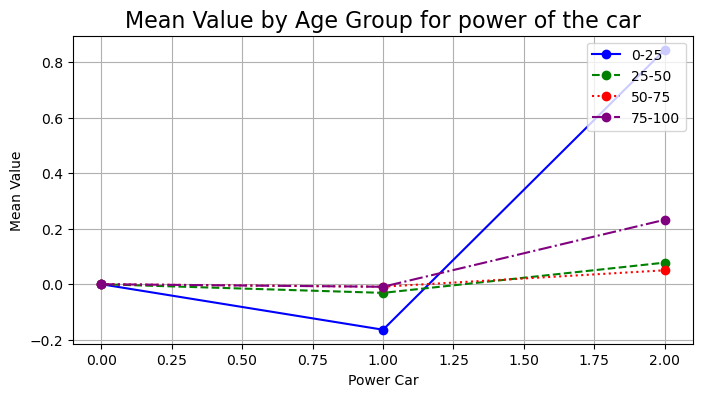

In [ ]:
label = ['0-25','25-50','50-75','75-100']
# Plot the DataFrame
styles = ['-', '--', ':', '-.']
colors = ['blue', 'green', 'red', 'purple']

plt.figure(figsize=(8, 4))  # Adjust figure size
for i in range(4):
    plt.plot(df.index, df[i], label=label[i], linestyle=styles[i], color=colors[i], marker='o')

# Add labels and legend
plt.xlabel('Power Car')
plt.ylabel('Mean Value')
plt.title('Mean Value by Age Group for power of the car', fontsize=16)  # Increase title font size
plt.grid(True)  # Add gridlines
plt.legend(loc='upper right')  # Adjust legend placement

plt.show()


In [ ]:

ice = partial_dependence(tree_freq,X_train,features=['coverp'], kind='individual',percentiles=(0,1),grid_resolution=5)
np.shape(ice['individual'])


for i in range(0,len(X_train)):
    ice_start = ice['individual'][0][i][-1]
    ice['individual'][0][i]=ice['individual'][0][i] - ice_start

    
plt.figure(figsize=(12,8))
age_0_25 = []
age_25_50 = []
age_50_75 = []
age_75_100 = []

for i in range(len(X_train)):
    age = X_train['ageph'].iloc[i]
    if age > 0 and age <= 19:
        age_0_25.append(ice['individual'][0][i])
    elif age > 19 and age <= 29:
        age_25_50.append(ice['individual'][0][i])
    elif age > 29 and age <= 39:
        age_50_75.append(ice['individual'][0][i])
    else:
        age_75_100.append(ice['individual'][0][i])


age_0_25 = pd.DataFrame(age_0_25).mean()
age_25_50 = pd.DataFrame(age_25_50).mean()
age_50_75 = pd.DataFrame(age_50_75).mean()
age_75_100 = pd.DataFrame(age_75_100).mean()

df = pd.DataFrame(index=range(3), columns=range(4))
df.iloc[:,0]= age_0_25
df.iloc[:,1] = age_25_50
df.iloc[:,2]= age_50_75
df.iloc[:,3]= age_75_100

df_reversed = df[::-1]
df_reversed

,0,1,2,3
2,0.0,0.0,0.0,0.0
1,-0.028244,-0.024212,-0.012083,-0.028131
0,-0.001289,-0.016073,0.005664,-0.017309


<Figure size 1200x800 with 0 Axes>

In [ ]:
df.iloc[0]

0   -0.001289
1   -0.016073
2    0.005664
3   -0.017309
Name: 0, dtype: object

In [ ]:
df.iloc[1]

0   -0.028244
1   -0.024212
2   -0.012083
3   -0.028131
Name: 1, dtype: object

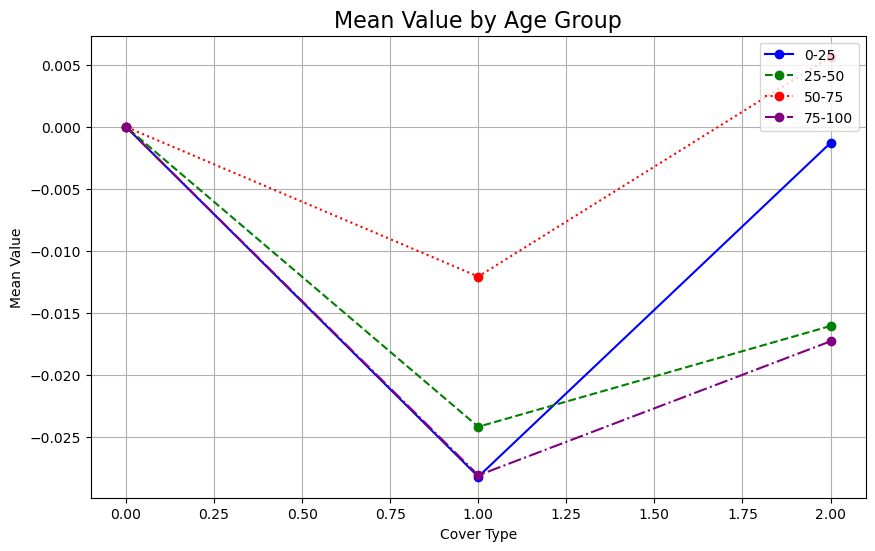

In [ ]:
label = ['0-25','25-50','50-75','75-100']
# Plot the DataFrame
styles = ['-', '--', ':', '-.']  # Line styles
colors = ['blue', 'green', 'red', 'purple']  # Line colors

plt.figure(figsize=(10, 6))  # Adjust figure size
for i in range(4):
    plt.plot(df_reversed.index, df.iloc[:, i], label=label[i], linestyle=styles[i], color=colors[i], marker='o')

# Add labels and legend
plt.xlabel('Coverage')
plt.ylabel('Mean Value')
plt.title('Mean Value by Age Group for Coverage', fontsize=16)  # Increase title font size
plt.grid(True)  # Add gridlines
plt.legend(loc='upper right')  # Adjust legend placement
